# MOwNiT 
## Laboratorium 4

### Tablice wielowymiarowe i mnożenie macierzy w Julii

In [253]:
# tablice wielowymiarowe w Julii
Asmall = [[1.0 4.0]; [0.0 1.0]]
Bsmall = Asmall
# size(B,1)

2×2 Array{Float64,2}:
 1.0  4.0
 0.0  1.0

#### Wersja naiwna

In [254]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

naive_multiplication (generic function with 1 method)

In [255]:
#kompilacja
naive_multiplication(Asmall, Bsmall)

2×2 Array{Float64,2}:
 1.0  8.0
 0.0  1.0

In [256]:
#kompilacja
@elapsed naive_multiplication(Asmall, Bsmall)

4.699e-6

#### Wersja ulepszona

In [257]:
# Należy pamiętać o "column-major" dostępie do tablic - 
# pierwszy indeks zmienia się szybciej
# tak jak Matlab, R, Fortran 
# inaczej niz C, Python
A1 = [[1 2]; [3 4]]
display(A1)
vec(A1)

2×2 Array{Int64,2}:
 1  2
 3  4

4-element Array{Int64,1}:
 1
 3
 2
 4

In [258]:
# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
# można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

In [259]:
@elapsed better_multiplication(Asmall, Bsmall)

0.0291084

#### Wersja BLASowa

In [260]:
#kompilacja funkcji BLASowej do mnożenia macierzy
#https://docs.julialang.org/en/stable/stdlib/linalg/#BLAS-Functions-1
Asmall*Bsmall

2×2 Array{Float64,2}:
 1.0  8.0
 0.0  1.0

#### Porównanie wersji

In [261]:
A = rand(1000, 1000);
B = rand(1000, 1000);

In [262]:
@elapsed naive_multiplication(A, B)

4.486142901

In [263]:
@elapsed better_multiplication(A, B)

1.8491684

In [264]:
@elapsed A*B

0.0235721

### Wielomiany i aproksymacja średniokwadratowa

In [265]:
# pakiet Polynomials jest mozliwy do instalacji pod Juliabox
# https://github.com/JuliaMath/Polynomials.jl
# using Pkg
# Pkg.add("Polynomials")

In [266]:
# Przykładowa funkcja, którą będziemy aproksymować
myfun = exp

exp (generic function with 17 methods)

In [267]:
# aproksymacja sredniokwadratowa wielomianem - tutaj przyklad dla wielomianu 3 stopnia
using Polynomials
# tworzę punkty do aproksymacji (tutaj jako przykład wyliczone wartości funkcji e^x)
xs = 0:10
ys = map(myfun, xs)

# dopasowuje wielomian trzeciego stopnia do danych
fit_poly_3 = fit(xs, ys, 3)

Polynomial(-1086.8658708490193 + 2905.5721994684577*x - 1082.745723874463*x^2 + 100.44658880845408*x^3)

In [268]:
typeof(fit_poly_3)

Polynomial{Float64,:x}

In [269]:
# obliczanie wartosci wielomianu 
fit_poly_3(1)

836.4071935534294

In [270]:
using Plots

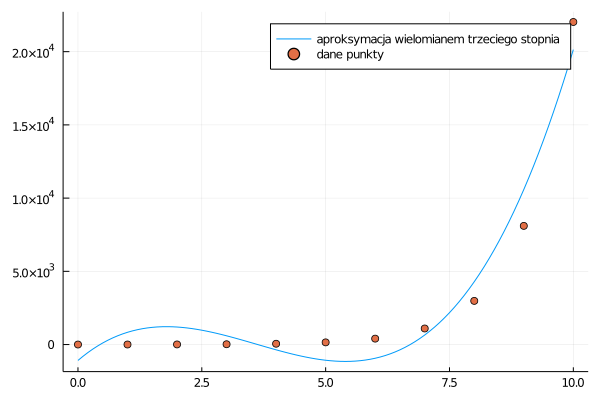

In [271]:
plot(fit_poly_3,  extrema(xs)..., label="aproksymacja wielomianem trzeciego stopnia")
# ! -dodanie do tego samego wykresu punktów wg ktorych aproksymowalismy
scatter!(xs, ys, label ="dane punkty")

### Wielomiany Czebyszewa w pakiecie Polynomials

In [272]:
# podajemy tablicę współczynników, gdzie wielomiany Czebyszewa są wielomianami bazowymi np dla T2(x)
t2 = ChebyshevT([0, 0, 1])

ChebyshevT(1⋅T_2(x))

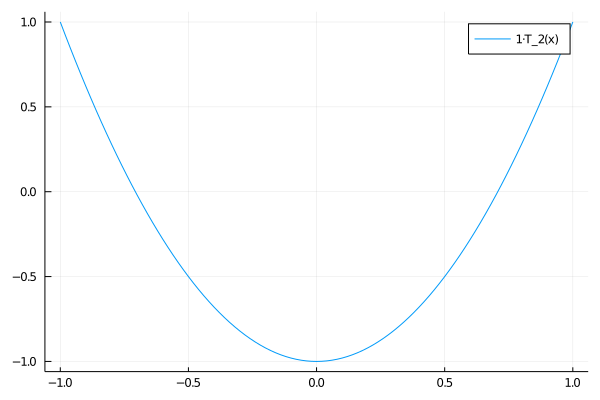

In [273]:
plot(t2)

In [274]:
#zera wielomianu Czebyszewa T2
Polynomials.roots(t2)

2-element Array{Float64,1}:
 -0.7071067811865475
  0.7071067811865476

In [275]:
# konwersja na wielomian
convert(Polynomial, t2)

Polynomial(-1.0 + 2.0*x^2)

In [276]:
# można tworzyć kombinacje liniowe w bazie wielomianów Czebyszewa
kombinacja_T = ChebyshevT([3,2,1])

ChebyshevT(3⋅T_0(x) + 2⋅T_1(x) + 1⋅T_2(x))

In [277]:
convert(Polynomial, kombinacja_T)

Polynomial(2.0 + 2.0*x + 2.0*x^2)

Skąd się wzieło polynomials logo :-)
https://juliamath.github.io/Polynomials.jl/stable/reference/#Example:-The-Polynomials.jl-logo-1

## Aproksymacja jednostajna Taylora i Pade

In [278]:
#using Pkg;
#Pkg.add("TaylorSeries")

In [279]:
using TaylorSeries

In [280]:
# Definiujemy, ile pierwszych wyrazów szeregu Taylora nas interesuje
t = Taylor1(Float64, 5)

 1.0 t + 𝒪(t⁶)

In [281]:
#Rozwinięcie Taylora 
myfun_taylor = myfun(t)

 1.0 + 1.0 t + 0.5 t² + 0.16666666666666666 t³ + 0.041666666666666664 t⁴ + 0.008333333333333333 t⁵ + 𝒪(t⁶)

In [282]:
# Julia hint - jak zapytać o pola typu danych
fieldnames(typeof(myfun_taylor))

(:coeffs, :order)

In [283]:
# mogę wyciągnąć ze struktury typu  odpowiednie pole
myfun_taylor.coeffs

6-element Array{Float64,1}:
 1.0
 1.0
 0.5
 0.16666666666666666
 0.041666666666666664
 0.008333333333333333

In [284]:
# Z przybliżenia Taylora tworzę wielomian zrozumiały dla pakietu Polynomials (typ Polynomial)
myfun_t_pol = Polynomial(myfun_taylor.coeffs)

Polynomial(1.0 + 1.0*x + 0.5*x^2 + 0.16666666666666666*x^3 + 0.041666666666666664*x^4 + 0.008333333333333333*x^5)

In [285]:
# mogę zamienić przybliżenie Taylora na aproksymację Pade (np. dla n=2, m=2)
myfun_pade = Polynomials.PolyCompat.PadeApproximation.Pade(myfun_t_pol, 2, 2)

Polynomials.PolyCompat.PadeApproximation.Pade{Float64,Float64}(Polynomial(1.0 + 0.5000000000000001*x + 0.08333333333333333*x^2), Polynomial(1.0 - 0.5*x + 0.08333333333333333*x^2), :x)

### Zadania
 
1. Uruchomić 
   - `naive_multiplication(A,B)`, 
   - `better_multiplication(A,B)` 
   - mnożenie BLAS w Julii (`A*B`) 

    dla coraz większych macierzy kwadratowych i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny być na jednym wykresie. (1pkt)
 
 
2. Napisać w języku C:
   - naiwną metodę mnożenia macierzy kwadratowych (wersja 1) 
   - ulepszoną wersję za pomocą zamiany pętli metodę mnożenia macierzy(wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
   - skorzystać z  możliwości BLAS poziom 3 dostępnego w GSL  (przykład uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1. (osobno niż p.1).
    
    *(Dla chętnych)* sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu. (1 pkt)


3. Użyć funkcji `polyfit` z pakietu  Polynomials   do znalezienia odpowiednich wielomianów, które najlepiej pasują do zależności czasowych każdego z algorytmów. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianów do wcześniejszych wykresów. (1 pkt)

4. Pokazać zniwelowanie efektu Rungego  poprzez użycie wsparcia dla wielomianów Czebyszewa w pakiecie Polynomials. Wymagany wykres. (1 pkt)

5. Przybliżenie Pade jest często lepsze niż rozwinięcie w szereg Taylora przy aproksymowaniu funkcji, które posiadają osobliwości. Korzystając ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazać dowolny przykład (wraz z wykresem), gdzie takie przybliżenie faktycznie jest lepsze. Można odtworzyć wykres z wykładu albo zainspirować się przykładowym artykułem https://www.hindawi.com/journals/ijcm/2014/587430/ (1 pkt)


# Mnozenie w Julii

In [286]:
timesnaive = zeros(0)
timesbetter = zeros(0)
timesblas = zeros(0)
dimensions = zeros(0)
for i in 1:300
    for j in 1:10
        m1 = rand(i,i)
        m2 = rand(i,i)
        append!(timesnaive,@elapsed naive_multiplication(m1,m2))
        append!(timesbetter,@elapsed better_multiplication(m1,m2))
        append!(timesblas,@elapsed m1*m2)
        append!(dimensions,i)
    end
end

In [287]:
using DataFrames
using Statistics
using Plots

In [288]:
df = DataFrame(dimensions = dimensions, timesnaive = timesnaive, timesblas = timesblas, timesbetter = timesbetter)

3000×4 DataFrame
  Row │ dimensions  timesnaive  timesblas    timesbetter 
      │ Float64     Float64     Float64      Float64     
──────┼──────────────────────────────────────────────────
    1 │        1.0   3.0e-7     4.101e-6       4.0e-7
    2 │        1.0   1.0e-7     2.0e-7         1.0e-7
    3 │        1.0   1.0e-7     2.0e-7         1.0e-7
    4 │        1.0   1.0e-7     3.0e-7         1.0e-7
    5 │        1.0   1.0e-7     2.0e-7         0.0
    6 │        1.0   1.0e-7     2.0e-7         1.0e-7
    7 │        1.0   0.0        2.0e-7         1.0e-7
    8 │        1.0   1.0e-7     3.0e-7         1.0e-7
    9 │        1.0   2.0e-7     2.0e-7         1.0e-7
   10 │        1.0   1.0e-7     2.0e-7         1.0e-7
   11 │        2.0   2.0e-7     3.0e-7         2.0e-7
  ⋮   │     ⋮           ⋮            ⋮            ⋮
 2991 │      300.0   0.0782919  0.000918901    0.0458807
 2992 │      300.0   0.0805465  0.0010493      0.0476612
 2993 │      300.0   0.0790103  0.000904101    0.0438234
 2994 │      300.0   0.0788251  0.000915099    0.0444381
 2995 │      300.0   0.0873983  0.0010808      0.0487424
 2996 │      300.0   0.0816963  0.000933399    0.046143
 2997 │      300.0   0.0894589  0.0012081      0.0609213
 2998 │      300.0   0.0926316  0.0009474      0.0453162
 2999 │      300.0   0.0784298  0.000953199    0.0458232
 3000 │      300.0   0.0793296  0.0009719      0.0440689
                                        2979 rows omitted

In [289]:
gdf = groupby(df,:dimensions)
gdf = combine(gdf,:timesnaive => mean,:timesnaive => std,:timesbetter => mean,:timesbetter => std, :timesblas => mean , :timesblas => std)

300×7 DataFrame
 Row │ dimensions  timesnaive_mean  timesnaive_std  timesbetter_mean  timesbet ⋯
     │ Float64     Float64          Float64         Float64           Float64  ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │        1.0        1.2e-7         7.88811e-8         1.2e-7         1.03 ⋯
   2 │        2.0        1.2e-7         4.21637e-8         1.6e-7         1.26
   3 │        3.0        1.701e-7       8.23683e-8         1.8e-7         1.03
   4 │        4.0        2.3e-7         4.83046e-8         2.099e-7       3.16
   5 │        5.0        3.8e-7         1.13529e-7         4.0e-7         9.40 ⋯
   6 │        6.0        5.101e-7       1.19713e-7         5.3e-7         6.74
   7 │        7.0        6.802e-7       4.22711e-8         7.798e-7       6.33
   8 │        8.0        1.1101e-6      1.2866e-7          1.14e-6        1.34
   9 │        9.0        1.4401e-6      1.43031e-7         1.4699e-6      1.24 ⋯
  10 │       10.0        2.0001e-6      1.41579e-7         2.0501e-6      1.26
  11 │       11.0        3.2302e-6      9.64877e-7         2.92e-6        4.80
  ⋮  │     ⋮              ⋮               ⋮                ⋮                 ⋮ ⋱
 291 │      291.0        0.0910463      0.0168995          0.0471841      0.00
 292 │      292.0        0.0802102      0.00614421         0.0468527      0.00 ⋯
 293 │      293.0        0.0807613      0.00514483         0.0483034      0.00
 294 │      294.0        0.0816126      0.00649567         0.0474057      0.00
 295 │      295.0        0.0819684      0.00921049         0.0487268      0.00
 296 │      296.0        0.0842893      0.0098538          0.0471857      0.00 ⋯
 297 │      297.0        0.0840866      0.00772637         0.0492925      0.00
 298 │      298.0        0.0869966      0.00916011         0.0501083      0.00
 299 │      299.0        0.0890533      0.00843498         0.0478623      0.00
 300 │      300.0        0.0825618      0.00526521         0.0472818      0.00 ⋯
                                                  3 columns and 279 rows omitted

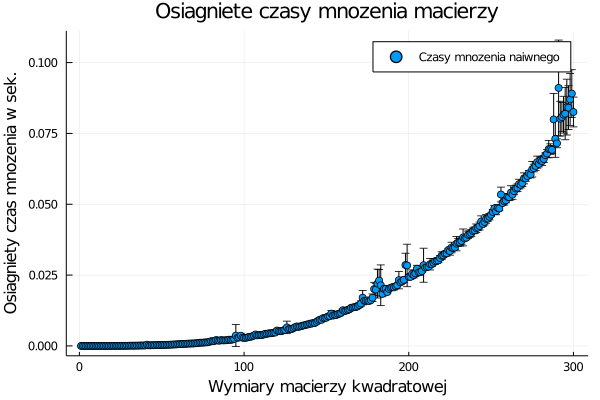

In [290]:
scatter(gdf.dimensions,gdf.timesnaive_mean,yerr = gdf.timesnaive_std,label = "Czasy mnozenia naiwnego",title = "Osiagniete czasy mnozenia macierzy",xlabel = "Wymiary macierzy kwadratowej",ylabel = "Osiagniety czas mnozenia w sek.")

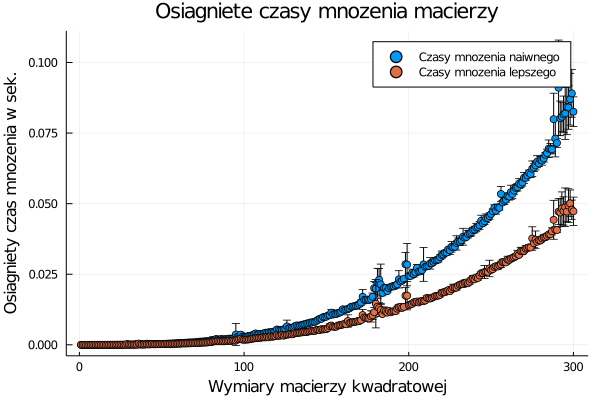

In [291]:
scatter!(gdf.dimensions,gdf.timesbetter_mean,yerr = gdf.timesbetter_std,label = "Czasy mnozenia lepszego")

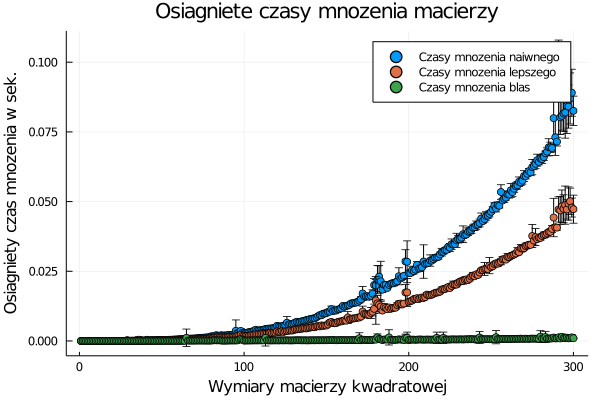

In [292]:
scatter!(gdf.dimensions,gdf.timesblas_mean,yerr = gdf.timesblas_std,label = "Czasy mnozenia blas")

In [293]:
p1 = fit(gdf.dimensions,gdf.timesnaive_mean,3)

Polynomial(-0.0007020224599916615 + 3.3062092010754826e-5*x - 3.25399481576412e-7*x^2 + 3.844789224717726e-9*x^3)

In [294]:
p2 = fit(gdf.dimensions,gdf.timesbetter_mean,3)

Polynomial(-0.0004225700831152873 + 1.9621747967833334e-5*x - 1.6254762169507352e-7*x^2 + 2.1016577601178967e-9*x^3)

In [295]:
p3 = fit(gdf.dimensions,gdf.timesblas_mean,3)

Polynomial(-4.948704371214465e-5 + 2.929689415707672e-6*x - 8.619675786889359e-9*x^2 + 3.776273618301764e-11*x^3)

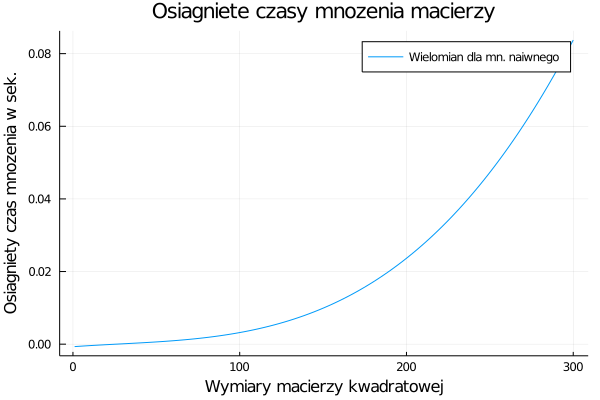

In [296]:
plot(p1,extrema(gdf.dimensions)...,label = "Wielomian dla mn. naiwnego",title = "Osiagniete czasy mnozenia macierzy",xlabel = "Wymiary macierzy kwadratowej",ylabel = "Osiagniety czas mnozenia w sek.")

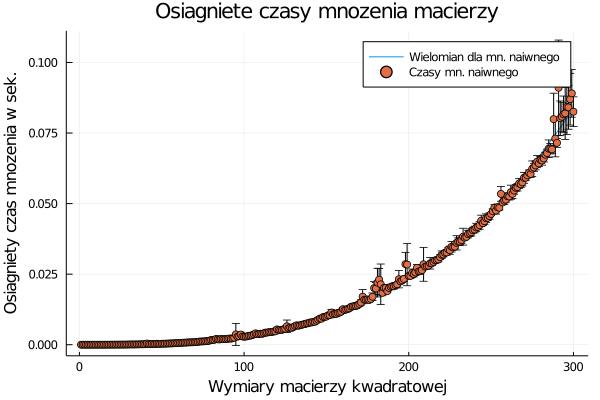

In [297]:
scatter!(gdf.dimensions,gdf.timesnaive_mean,label = "Czasy mn. naiwnego",yerr = gdf.timesnaive_std)

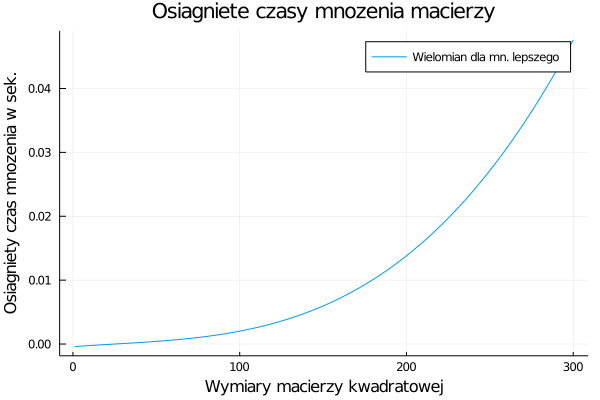

In [298]:
plot(p2,extrema(gdf.dimensions)...,label = "Wielomian dla mn. lepszego",title = "Osiagniete czasy mnozenia macierzy",xlabel = "Wymiary macierzy kwadratowej",ylabel = "Osiagniety czas mnozenia w sek.")

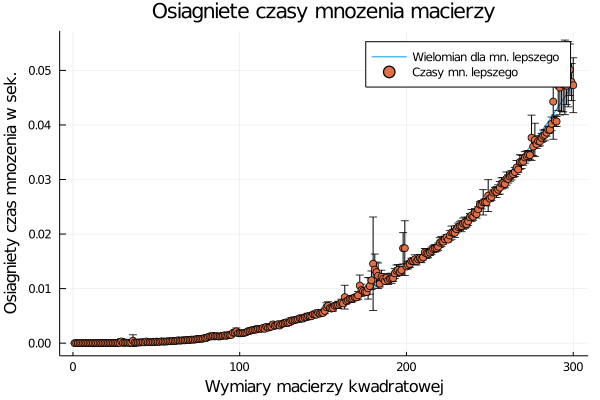

In [299]:
scatter!(gdf.dimensions,gdf.timesbetter_mean,label = "Czasy mn. lepszego",yerr = gdf.timesbetter_std)

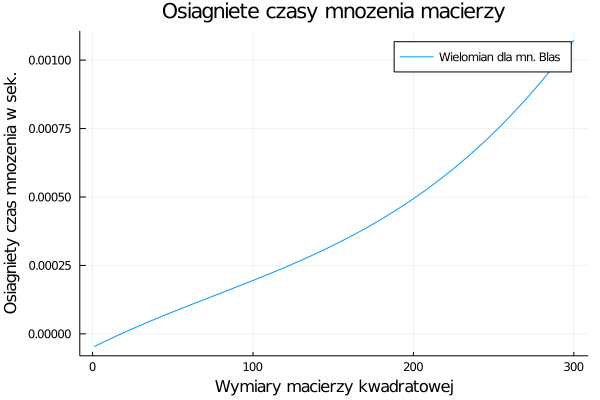

In [300]:
plot(p3,extrema(gdf.dimensions)...,label = "Wielomian dla mn. Blas",title = "Osiagniete czasy mnozenia macierzy",xlabel = "Wymiary macierzy kwadratowej",ylabel = "Osiagniety czas mnozenia w sek.")

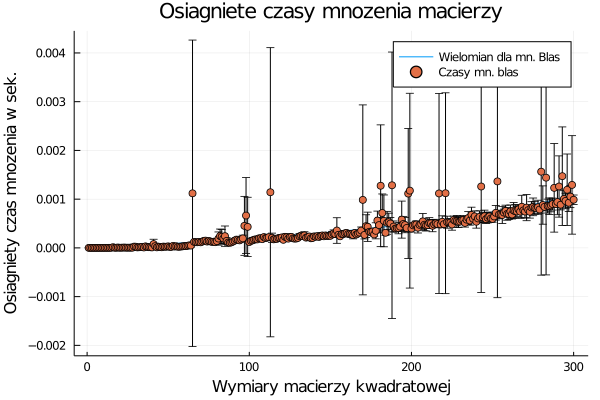

In [301]:
scatter!(gdf.dimensions,gdf.timesblas_mean,label = "Czasy mn. blas",yerr = gdf.timesblas_std)

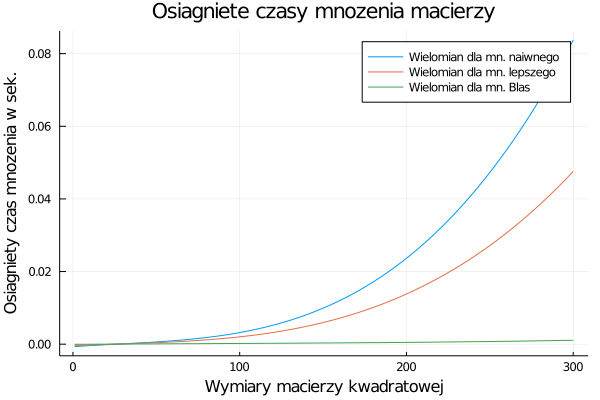

In [302]:
plot(p1,extrema(gdf.dimensions)...,label = "Wielomian dla mn. naiwnego",title = "Osiagniete czasy mnozenia macierzy",xlabel = "Wymiary macierzy kwadratowej",ylabel = "Osiagniety czas mnozenia w sek.")
plot!(p2,extrema(gdf.dimensions)...,label = "Wielomian dla mn. lepszego")
plot!(p3,extrema(gdf.dimensions)...,label = "Wielomian dla mn. Blas")

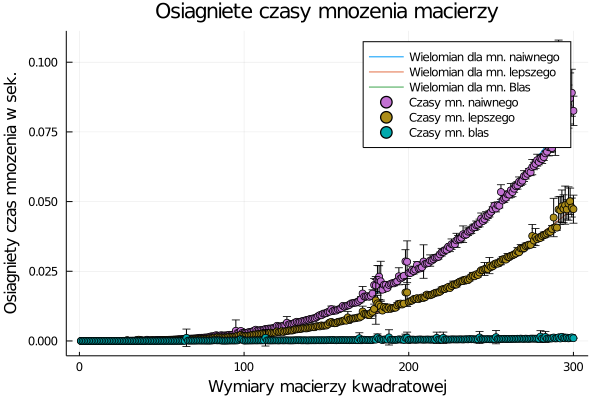

In [303]:
scatter!(gdf.dimensions,gdf.timesnaive_mean,label = "Czasy mn. naiwnego",yerr = gdf.timesnaive_std)
scatter!(gdf.dimensions,gdf.timesbetter_mean,label = "Czasy mn. lepszego",yerr = gdf.timesbetter_std)
scatter!(gdf.dimensions,gdf.timesblas_mean,label = "Czasy mn. blas",yerr = gdf.timesblas_std)

# Mnozenie w C

In [304]:
using CSV

Kod wynonany w celu wykonania polecenia

    #include<stdio.h>
    #include<stdlib.h>
    #include <time.h>
    #include<gsl/gsl_blas.h>
    void naivemultiplication(int** A, int** B, int n, int m) {
        int i, j, k, res;
        for (i = 0; i < n; i++) {
            for (j = 0; j < m; j++) {
                res = 0;
                for (k = 0; k < n; k++) {
                    res += A[i][k] * B[k][j];
                }
            }
        }
    }
    void bettermultiplication(int** A, int** B, int n, int m) {
        int i, j, k, res;
        for (i = 0; i < m; i++) {
            for (j = 0; j < n; j++) {
                res = 0;
                for (k = 0; k < n; k++) {
                    res += A[i][k] * B[k][j];
                }
            }
        }
    }
    void fillMatrix(int** tab, int n) {
        int i, j;
        for (i = 0; i < n; i++) {
            for (j = 0; j < n; j++) {
                tab[i][j] = i + j;
            }
        }
    }
    int main() {
        clock_t start, end;
        double timer;
        int i, j, k,l,counter;
        printf("Dimension\tNaive\tBetter\tBlas\n");
        for (i = 1; i <= 300; i++) {
            for (counter = 0; counter < 10; counter++) {
                printf("%d\t", i);
                int** A = static_cast<int**>(malloc(i * sizeof(*A)));
                for (k = 0; k < i; k++) {
                    A[k] = (int*)malloc(i * sizeof(int));
                }

                int** B = static_cast<int**>(malloc(i * sizeof(*B)));
                for (k = 0; k < i; k++) {
                    B[k] = (int*)malloc(i * sizeof(int));
                }
                gsl_matrix* X;
                gsl_matrix* Y;
                gsl_matrix* C;
                X = gsl_matrix_alloc(i, i);
                Y = gsl_matrix_alloc(i, i);
                C = gsl_matrix_alloc(i, i);
                for (k = 0; k < i; k++) {
                    gsl_matrix_set(X, k, 0, 1.0);
                }
                for (k = 0; k < i; k++) {
                    for (l = 1; l < i; l++) {
                        gsl_matrix_set(X, k, l, 1.0 / (double)(k + l + 1));
                    }
                }
                gsl_matrix_transpose_memcpy(Y, X);

                fillMatrix(A, i);
                fillMatrix(B, i);

                start = clock();
                naivemultiplication(A, B, i, i);
                end = clock();
                timer = (double)(end - start) / CLOCKS_PER_SEC;
                printf("%lf\t", timer);

                start = clock();
                bettermultiplication(A, B, i, i);
                end = clock();
                timer = (double)(end - start) / CLOCKS_PER_SEC;
                printf("%lf\t", timer);

                start = clock();
                gsl_blas_dgemm(CblasNoTrans, CblasNoTrans, 1.0, Y, X, 0.0, C);
                end = clock();
                timer = (double)(end - start) / CLOCKS_PER_SEC;
                printf("%lf\n", timer);

                for (k = 0; k < i; k++) {
                    free(B[k]);
                    B[k] = nullptr;
                    free(A[k]);
                    A[k] = nullptr;
                }
                free(A);
                free(B);
                gsl_matrix_free(X);
                gsl_matrix_free(Y);
                gsl_matrix_free(C);
            }
        }
        return 0;

In [305]:
input="Zeszyt1.csv"
data = CSV.read(input,delim = ";",DataFrame)

3000×4 DataFrame
  Row │ Dimension  Naive    Better   Blas    
      │ Int64      Float64  Float64  Float64 
──────┼──────────────────────────────────────
    1 │         1    0.0      0.0      0.0
    2 │         1    0.0      0.0      0.0
    3 │         1    0.0      0.0      0.0
    4 │         1    0.0      0.0      0.0
    5 │         1    0.0      0.0      0.0
    6 │         1    0.0      0.0      0.0
    7 │         1    0.0      0.0      0.0
    8 │         1    0.0      0.0      0.0
    9 │         1    0.0      0.0      0.0
   10 │         1    0.0      0.0      0.0
   11 │         2    0.0      0.0      0.0
  ⋮   │     ⋮         ⋮        ⋮        ⋮
 2991 │       300    0.091    0.09     0.101
 2992 │       300    0.085    0.082    0.101
 2993 │       300    0.081    0.085    0.1
 2994 │       300    0.082    0.084    0.102
 2995 │       300    0.085    0.084    0.103
 2996 │       300    0.08     0.084    0.1
 2997 │       300    0.085    0.084    0.102
 2998 │       300    0.082    0.081    0.102
 2999 │       300    0.083    0.085    0.1
 3000 │       300    0.086    0.082    0.101
                            2979 rows omitted

In [306]:
gdf = groupby(data,:Dimension)
gdf = combine(gdf,:Naive => mean,:Naive => std,:Better => mean,:Better => std, :Blas => mean , :Blas => std)

300×7 DataFrame
 Row │ Dimension  Naive_mean  Naive_std   Better_mean  Better_std  Blas_mean   ⋯
     │ Int64      Float64     Float64     Float64      Float64     Float64     ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │         1      0.0     0.0              0.0     0.0            0.0      ⋯
   2 │         2      0.0     0.0              0.0     0.0            0.0
   3 │         3      0.0     0.0              0.0     0.0            0.0
   4 │         4      0.0     0.0              0.0     0.0            0.0
   5 │         5      0.0     0.0              0.0     0.0            0.0      ⋯
   6 │         6      0.0     0.0              0.0     0.0            0.0
   7 │         7      0.0     0.0              0.0     0.0            0.0
   8 │         8      0.0     0.0              0.0     0.0            0.0
   9 │         9      0.0     0.0              0.0     0.0            0.0      ⋯
  10 │        10      0.0     0.0              0.0     0.0            0.0
  11 │        11      0.0     0.0              0.0     0.0            0.0
  ⋮  │     ⋮          ⋮           ⋮            ⋮           ⋮           ⋮       ⋱
 291 │       291      0.0751  0.00223358       0.0742  0.00139841     0.0919
 292 │       292      0.0767  0.00211082       0.0752  0.0018738      0.0938   ⋯
 293 │       293      0.0762  0.00204396       0.076   0.00176383     0.0951
 294 │       294      0.0768  0.00175119       0.0772  0.00278089     0.0951
 295 │       295      0.0784  0.00177639       0.0774  0.00201108     0.0969
 296 │       296      0.0798  0.00225093       0.0791  0.00213177     0.0974   ⋯
 297 │       297      0.0814  0.00206559       0.0805  0.00158114     0.098
 298 │       298      0.082   0.00163299       0.0812  0.00181353     0.0998
 299 │       299      0.0827  0.0011595        0.0817  0.00188856     0.1001
 300 │       300      0.084   0.00316228       0.0841  0.00246982     0.1012   ⋯
                                                   1 column and 279 rows omitted

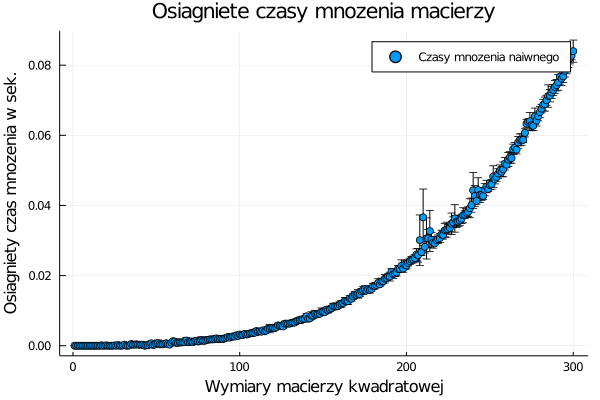

In [307]:
scatter(gdf.Dimension,gdf.Naive_mean,yerr = gdf.Naive_std,label="Czasy mnozenia naiwnego",title = "Osiagniete czasy mnozenia macierzy",xlabel = "Wymiary macierzy kwadratowej",ylabel = "Osiagniety czas mnozenia w sek.")

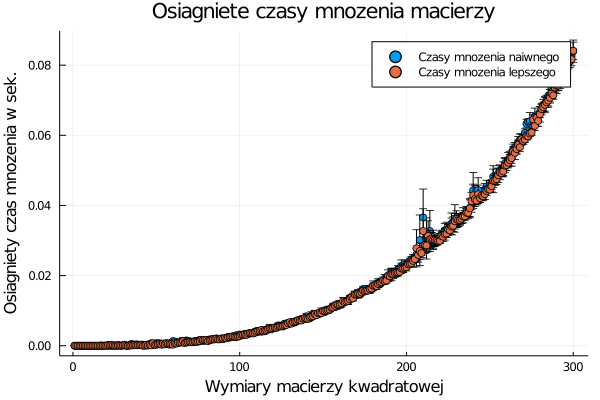

In [308]:
scatter!(gdf.Dimension,gdf.Better_mean,yerr = gdf.Better_std,label = "Czasy mnozenia lepszego",title = "Osiagniete czasy mnozenia macierzy",xlabel = "Wymiary macierzy kwadratowej",ylabel = "Osiagniety czas mnozenia w sek.")

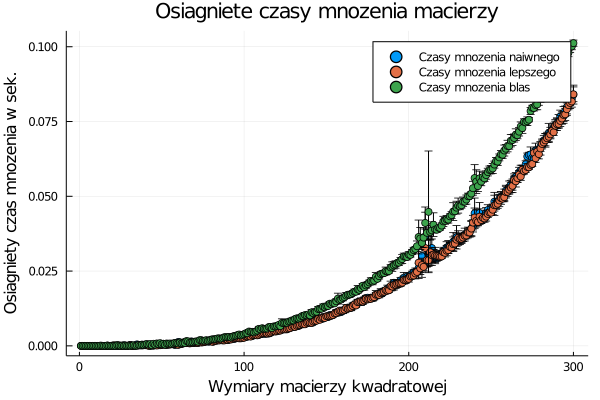

In [309]:
scatter!(gdf.Dimension,gdf.Blas_mean,yerr = gdf.Blas_std,label = "Czasy mnozenia blas")

In [310]:
a = fit(gdf.Dimension,gdf.Naive_mean,3)

Polynomial(-0.00032281859030852217 + 2.057463834988763e-5*x - 2.3778386180393518e-7*x^2 + 3.6405620123421803e-9*x^3)

In [311]:
b = fit(gdf.Dimension,gdf.Better_mean,3)

Polynomial(-0.0004377515119621954 + 2.376784127535328e-5*x - 2.606905513372381e-7*x^2 + 3.6495385708910946e-9*x^3)

In [312]:
c = fit(gdf.Dimension,gdf.Blas_mean,3)

Polynomial(0.000212235400475826 - 1.1304378258638835e-5*x + 1.5644305960149344e-7*x^2 + 3.3478594236690088e-9*x^3)

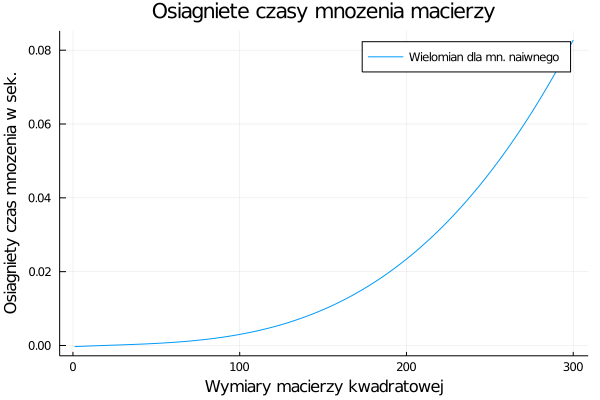

In [313]:
plot(a,extrema(gdf.Dimension)...,label = "Wielomian dla mn. naiwnego",title = "Osiagniete czasy mnozenia macierzy",xlabel = "Wymiary macierzy kwadratowej",ylabel = "Osiagniety czas mnozenia w sek.")

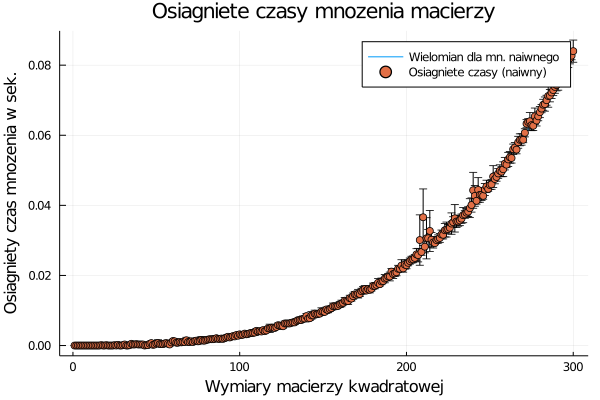

In [314]:
scatter!(gdf.Dimension,gdf.Naive_mean,label = "Osiagniete czasy (naiwny)",yerr = gdf.Naive_std,title = "Osiagniete czasy mnozenia macierzy",xlabel = "Wymiary macierzy kwadratowej",ylabel = "Osiagniety czas mnozenia w sek.")

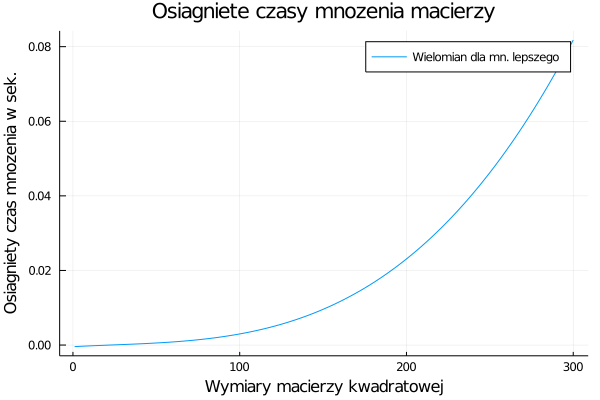

In [315]:
plot(b,extrema(gdf.Dimension)...,label = "Wielomian dla mn. lepszego",title = "Osiagniete czasy mnozenia macierzy",xlabel = "Wymiary macierzy kwadratowej",ylabel = "Osiagniety czas mnozenia w sek.")

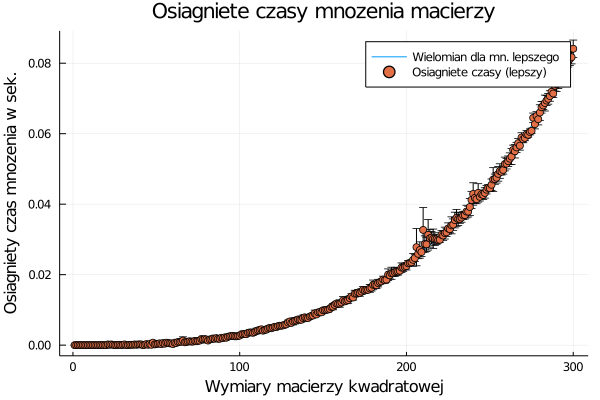

In [316]:
scatter!(gdf.Dimension,gdf.Better_mean,label = "Osiagniete czasy (lepszy)",yerr = gdf.Better_std)

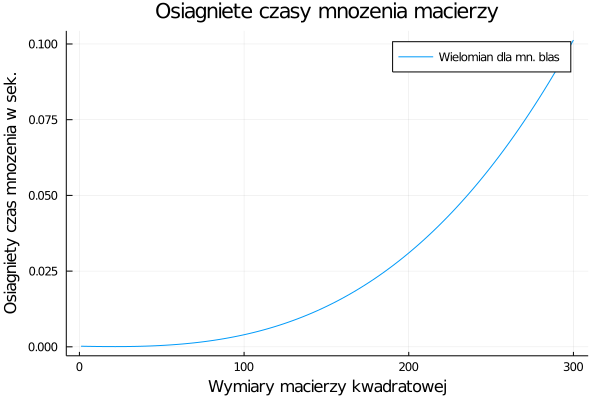

In [317]:
plot(c,extrema(gdf.Dimension)...,label = "Wielomian dla mn. blas",title = "Osiagniete czasy mnozenia macierzy",xlabel = "Wymiary macierzy kwadratowej",ylabel = "Osiagniety czas mnozenia w sek.")

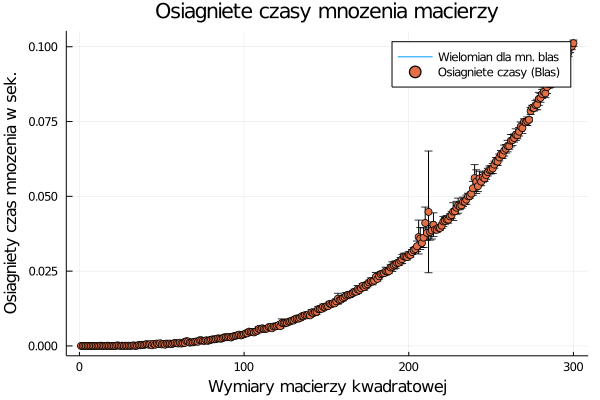

In [318]:
scatter!(gdf.Dimension,gdf.Blas_mean,label = "Osiagniete czasy (Blas)",yerr = gdf.Blas_std)

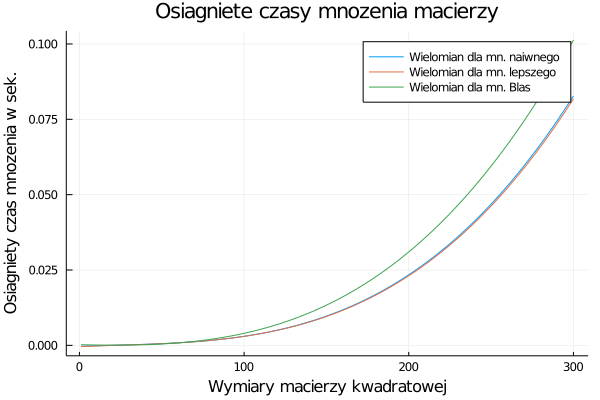

In [319]:
plot(a,extrema(gdf.Dimension)...,label = "Wielomian dla mn. naiwnego",title = "Osiagniete czasy mnozenia macierzy",xlabel = "Wymiary macierzy kwadratowej",ylabel = "Osiagniety czas mnozenia w sek.")
plot!(b,extrema(gdf.Dimension)...,label = "Wielomian dla mn. lepszego")
plot!(c,extrema(gdf.Dimension)...,label = "Wielomian dla mn. Blas")

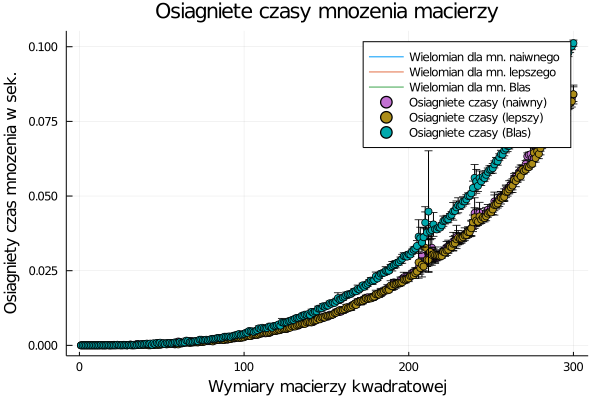

In [320]:
scatter!(gdf.Dimension,gdf.Naive_mean,label = "Osiagniete czasy (naiwny)",yerr = gdf.Naive_std)
scatter!(gdf.Dimension,gdf.Better_mean,label = "Osiagniete czasy (lepszy)",yerr = gdf.Better_std)
scatter!(gdf.Dimension,gdf.Blas_mean,label = "Osiagniete czasy (Blas)",yerr = gdf.Blas_std)

# Zadanie 4

In [321]:
function LagrangeInterpolation(xs,ys)
    function Lagrange(x)
        n = length(x)
        output = zeros(n)
        if(n == 1)
            output = 0
        end
        for k = 1:n
            N = length(xs)
            LagrangePolynomials = ones(N)
            for i in 1:N  
                for j in [1:i-1;i+1:N]     
                    LagrangePolynomials[i] = LagrangePolynomials[i].*(x[k]-xs[j])./(xs[i]-xs[j])
                end
            end
            n == 1 ? output = sum(LagrangePolynomials.*ys) : output[k] = sum(LagrangePolynomials.*ys)
        end
        return output
    end
    return Lagrange
end

LagrangeInterpolation (generic function with 1 method)

In [322]:
M = [rand() for i in 1:20]
N = [rand() for x in M]
L = LagrangeInterpolation(M,N)

(::var"#Lagrange#40"{Array{Float64,1},Array{Float64,1}}) (generic function with 1 method)

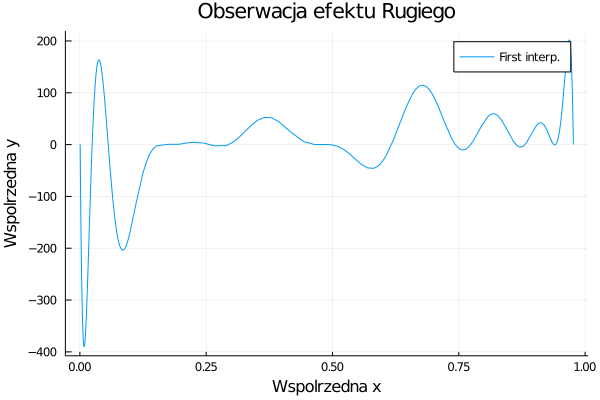

In [323]:
plot(L,extrema(M)...,label = "First interp.",xlabel = "Wspolrzedna x",ylabel = "Wspolrzedna y",title = "Obserwacja efektu Rugiego")

In [324]:
t = ChebyshevT(M)

ChebyshevT(0.48123193129013164⋅T_0(x) + 0.48941951924413263⋅T_1(x) + 0.02434456136003038⋅T_2(x) + 0.8627449147790509⋅T_3(x) + 0.45762132261661925⋅T_4(x) + 0.6169808721162107⋅T_5(x) + 0.16276164937806992⋅T_6(x) + 0.2954202704893023⋅T_7(x) + 0.7427943622684523⋅T_8(x) + 0.056084038401329916⋅T_9(x) + 0.18932484655561876⋅T_10(x) + 0.9377232485637235⋅T_11(x) + 0.9417286336988555⋅T_12(x) + 0.8813916569127216⋅T_13(x) + 0.25628446923751924⋅T_14(x) + 0.9768130272047792⋅T_15(x) + 0.2535986970801811⋅T_16(x) + 0.0005855350491852374⋅T_17(x) + 0.7739279232063627⋅T_18(x) + 0.17097699675784828⋅T_19(x))

In [325]:
czeb = convert(Polynomial,t)

Polynomial(1.4703314972166388 - 17.324764857295346*x + 35.241357657909695*x^2 + 627.8486392623101*x^3 - 2233.5317552058614*x^4 - 7919.20810813431*x^5 + 27934.930575627932*x^6 + 49361.44564281247*x^7 - 155632.80198454365*x^8 - 175510.78947785537*x^9 + 468685.30235792557*x^10 + 381699.30246114125*x^11 - 816817.4295244012*x^12 - 521833.79117783054*x^13 + 824762.1627806809*x^14 + 441636.6581933928*x^15 - 448171.3412713464*x^16 - 212859.44710594113*x^17 + 101440.28075050437*x^18 + 44820.59383808938*x^19)

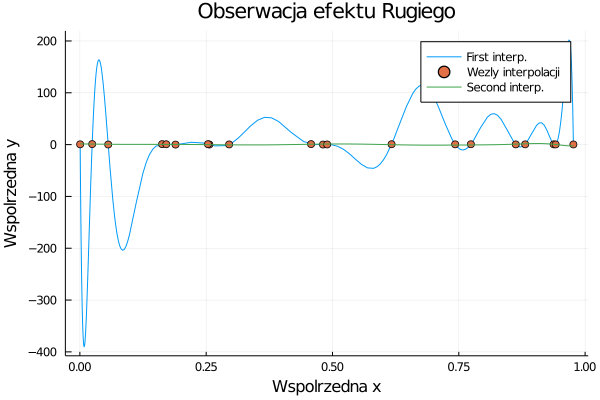

In [326]:
scatter!(M,N,label = "Wezly interpolacji")
plot!(czeb,extrema(M)...,label = "Second interp.")

In [327]:
M = [rand() for i in 1:50]
N = [rand() for x in M]
L = LagrangeInterpolation(M,N)

(::var"#Lagrange#40"{Array{Float64,1},Array{Float64,1}}) (generic function with 1 method)

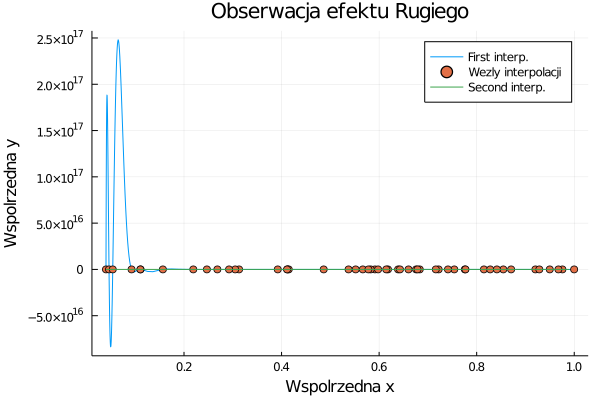

In [328]:
plot(L,extrema(M)...,label = "First interp.",xlabel = "Wspolrzedna x",ylabel = "Wspolrzedna y",title = "Obserwacja efektu Rugiego")
scatter!(M,N,label = "Wezly interpolacji")
t = ChebyshevT(M)
czeb = convert(Polynomial,t)
plot!(czeb,extrema(M)...,label = "Second interp.")

In [329]:
M = [rand() for i in 1:70]
N = [rand() for x in M]
L = LagrangeInterpolation(M,N)

(::var"#Lagrange#40"{Array{Float64,1},Array{Float64,1}}) (generic function with 1 method)

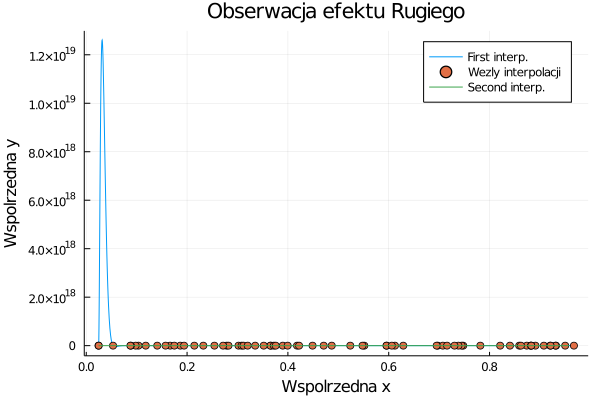

In [330]:
plot(L,extrema(M)...,label = "First interp.",xlabel = "Wspolrzedna x",ylabel = "Wspolrzedna y",title = "Obserwacja efektu Rugiego")
scatter!(M,N,label = "Wezly interpolacji")
t = ChebyshevT(M)
czeb = convert(Polynomial,t)
plot!(czeb,extrema(M)...,label = "Second interp.")

# Zadanie 5

In [331]:
function func(x)
    return (log(1+x))/x
end

func (generic function with 1 method)

In [332]:
t = Taylor1(Float64,5)
Tayl = func(t)

 1.0 - 0.5 t + 0.3333333333333333 t² - 0.25 t³ + 0.2 t⁴ + 𝒪(t⁶)

In [333]:
Pol = Polynomial(Tayl.coeffs)

Polynomial(1.0 - 0.5*x + 0.3333333333333333*x^2 - 0.25*x^3 + 0.2*x^4)

In [334]:
Approx =  Polynomials.PolyCompat.PadeApproximation.Pade(Pol, 2, 2)

Polynomials.PolyCompat.PadeApproximation.Pade{Float64,Float64}(Polynomial(1.0 + 0.6999999999999987*x + 0.03333333333333298*x^2), Polynomial(1.0 + 1.1999999999999986*x + 0.29999999999999905*x^2), :x)

In [335]:
xs = LinRange(0, 10, 400)
ys = [Approx(x) for x in xs]

400-element Array{Float64,1}:
 1.0
 0.9876741922175684
 0.9757445859508064
 0.9641901803434292
 0.9529915246813134
 0.9421305737275525
 0.9315905591797216
 0.9213558751787367
 0.9114119760979482
 0.9017452850925398
 0.8923431121012055
 0.8831935801712925
 0.8742855591305883
 ⋮
 0.26704845637416064
 0.2667252723760795
 0.2664034305376668
 0.26608292248052245
 0.2657637398961409
 0.26544587454518037
 0.26512931825674174
 0.264814062927656
 0.26450010052178086
 0.2641874230693058
 0.26387602266606675
 0.2635658914728678

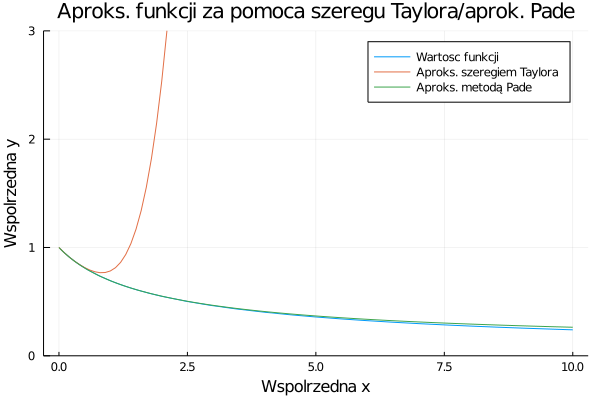

In [336]:
plot(func,0,10,ylim = (0,3),title = "Aproks. funkcji za pomoca szeregu Taylora/aprok. Pade",xlabel = "Wspolrzedna x",ylabel = "Wspolrzedna y",label = "Wartosc funkcji")
plot!(Pol,0,10,label = "Aproks. szeregiem Taylora")
plot!(xs,ys,label = "Aproks. metodą Pade")